## **Data Science Bootcamp, Spring '25**

<br>

---

### Assignment 3 : **Exploratory Data Analysis and Data Visualization**
#### Student: **Samrudhi Baldota**
#### NetID: **sb10212**

---
---

1.⁠ ⁠Filter the data to include only weekdays (Monday to Friday) and plot a line graph showing the pedestrian counts for each day of the week.

import pandas as pd

import matplotlib.pyplot as plt

# Read the dataset

url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"

df = pd.read_csv(url)

----- Write your code below this after running above above code-----------

<ipython-input-10-fb30569b19cb>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning'] = pd.to_datetime(df['hour_beginning'], errors='coerce')


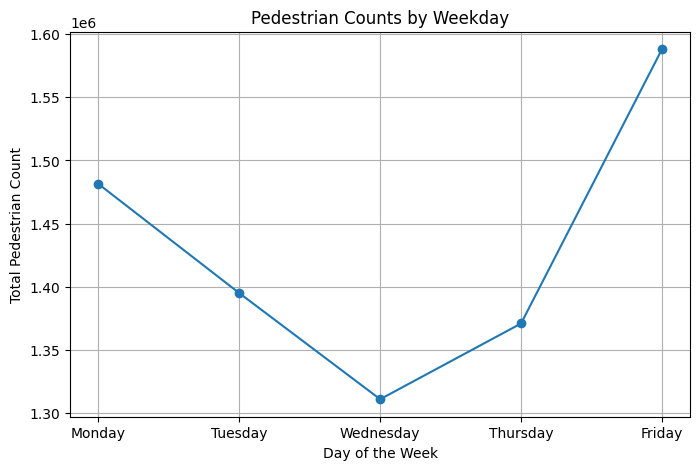

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)


df['hour_beginning'] = pd.to_datetime(df['hour_beginning'], errors='coerce')
df['DayOfWeek'] = df['hour_beginning'].dt.dayofweek

weekday_data = df[df['DayOfWeek'] < 5]

# Group by day of the week and sum pedestrian counts
weekday_counts = weekday_data.groupby('DayOfWeek')['Pedestrians'].sum()

# Plot the pedestrian counts
plt.figure(figsize=(8, 5))
plt.plot(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], weekday_counts, marker='o', linestyle='-')
plt.xlabel('Day of the Week')
plt.ylabel('Total Pedestrian Count')
plt.title('Pedestrian Counts by Weekday')
plt.grid()
plt.show()


In [ ]:
print(df.columns)

Index(['hour_beginning', 'location', 'Pedestrians', 'Towards Manhattan',
       'Towards Brooklyn', 'weather_summary', 'temperature', 'precipitation',
       'lat', 'long', 'events', 'Location1'],
      dtype='object')


2.⁠ ⁠Track pedestrian counts on the Brooklyn Bridge for the year 2019 and analyze how different weather conditions influence pedestrian activity in that year. Sort the pedestrian count data by weather summary to identify any correlations( with a correlation matrix) between weather patterns and pedestrian counts for the selected year.

-This question requires you to show the relationship between a numerical feature(Pedestrians) and a non-numerical feature(Weather Summary). In such instances we use Encoding. Each weather condition can be encoded as numbers( 0,1,2..). This technique is called One-hot encoding.

-Correlation matrices may not always be the most suitable visualization method for relationships involving categorical data points, nonetheless this was given as a question to help you understand the concept better.

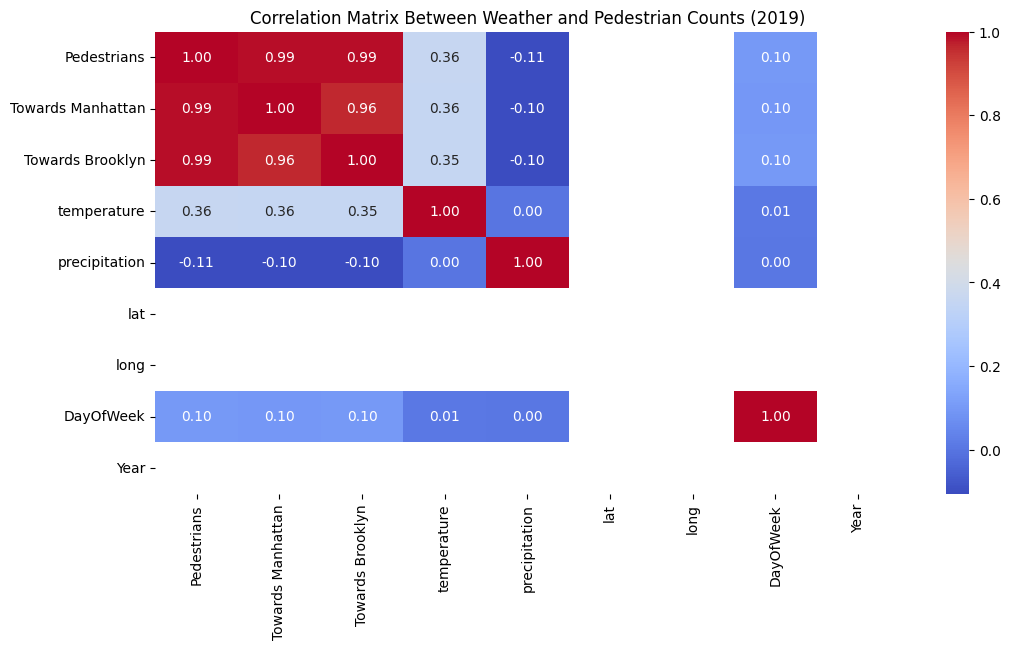

In [11]:
import seaborn as sns


df['Year'] = df['hour_beginning'].dt.year
df_2019 = df[df['Year'] == 2019]

# Perform one-hot encoding for 'weather_summary'
df_2019_encoded = pd.get_dummies(df_2019, columns=['weather_summary'])

# Drop non-numeric columns before computing correlation matrix
df_2019_numeric = df_2019_encoded.select_dtypes(include=['number'])

# Computing correlation matrix
correlation_matrix = df_2019_numeric.corr()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Between Weather and Pedestrian Counts (2019)")
plt.show()


3.⁠ ⁠Implement a custom function to categorize time of day into morning, afternoon, evening, and night, and create a new column in the DataFrame to store these categories. Use this new column to analyze pedestrian activity patterns throughout the day.

-Students can also show plots analyzing activity.

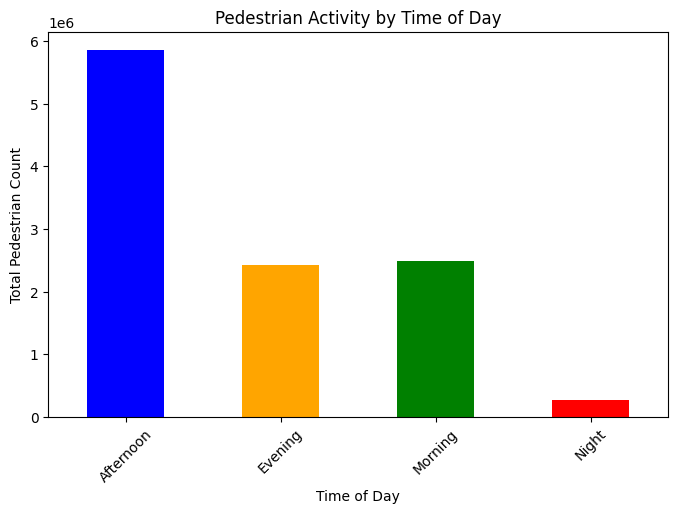

In [9]:
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'], errors='coerce')
df['Hour'] = df['hour_beginning'].dt.hour

# Function to categorize time of day
def categorize_time(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"

# Apply function to create a new column
df['TimeOfDay'] = df['Hour'].apply(categorize_time)

time_of_day_counts = df.groupby('TimeOfDay')['Pedestrians'].sum()

# Plot the pedestrian activity
plt.figure(figsize=(8, 5))
time_of_day_counts.plot(kind='bar', color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Time of Day')
plt.ylabel('Total Pedestrian Count')
plt.title('Pedestrian Activity by Time of Day')
plt.xticks(rotation=45)
plt.show()
